## Calculate total carbon storage

This example will use Planet's [Forest Carbon Monitoring](https://docs.cecil.earth/Forest-Carbon-Monitoring-111ef16bbbe4817aa1a8dce6d9216665) dataset to demonstrate one method of calculating the total carbon stored within an AOI. 

First, we set up the Cecil client and load the dataset of interest. 

In [7]:
import cecil
import xarray
import matplotlib.pyplot as plt

client = cecil.Client()

ds = client.load_xarray('c572bb90-84b8-42f1-884a-94f83acb6a5b')
ds

<xarray.Dataset> Size: 27MB
Dimensions:                                                  (x: 439, y: 361,
                                                              time: 14)
Coordinates:
  * x                                                        (x) float64 4kB ...
  * y                                                        (y) float64 3kB ...
    spatial_ref                                              int64 8B 0
  * time                                                     (time) datetime64[ns] 112B ...
Data variables:
    canopy_cover_uncertainty_upper_bound                     (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_cover_uncertainty_lower_bound                     (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_cover                                             (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    aboveground_live_carbon_density                          (time, y, x) int16 4MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    aboveground_live_carbon_density_uncertainty_upper_bound  (time, y, x) int16 4MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    aboveground_live_carbon_density_uncertainty_lower_bound  (time, y, x) int16 4MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_height_uncertainty_lower_bound                    (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_height_uncertainty_upper_bound                    (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
    canopy_height                                            (time, y, x) uint8 2MB dask.array<chunksize=(1, 361, 439), meta=np.ndarray>
Attributes:
    provider_name:    Planet
    dataset_id:       4d8bd6ba-b751-4c46-8e70-5000e6d8b212
    dataset_name:     Forest Carbon Monitoring
    dataset_crs:      EPSG:4326
    aoi_id:           7dbbf7c3-0447-45a7-8849-e031c6099c1c
    data_request_id:  c572bb90-84b8-42f1-884a-94f83acb6a5b

With xarray, we can use the `.mean()` function to calculate the mean value across the dimensions specified. In this case, we specify that we want to calculate the mean in the x and y dimensions so that we get an average aboveground carbon density value for the whole AOI, but we maintain each timestep. 

In [8]:
mean_acd = ds['aboveground_live_carbon_density'].mean(dim=['x', 'y'])

Next, we can calculate the area of the AOI that was used for this data request. The AOI id is stored in a dataset-level attribute that can be accessed like this: `ds.attrs['aoi_id']`

In [9]:
aoi_area = client.get_aoi(ds.attrs['aoi_id']).hectares
print(f"AOI area: {aoi_area:.2f} hectares")

AOI area: 118.12 hectares


Finally, multiplying the mean aboveground carbon density in Mg C per hectare by the AOI area in hectares will give us the total aboveground carbon density in Mg of carbon for this AOI. 

Note that across very large AOIs, the difference in pixel sizes across latitudes can begin to impact these results and a different approach may be recommended.

Text(0, 0.5, 'Total aboveground live carbon (Mg)')

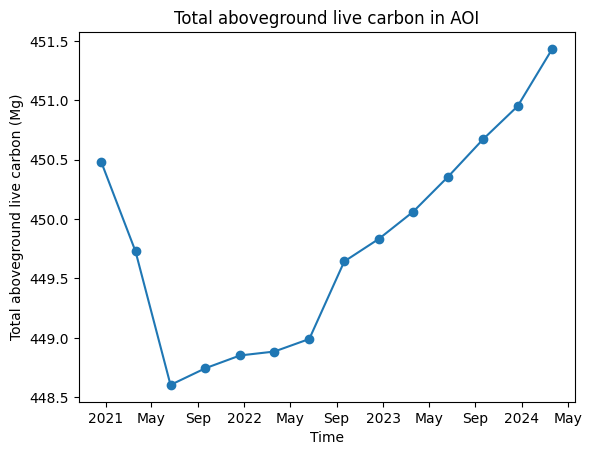

In [10]:
total_carbon = (mean_acd * aoi_area)

# Plot timeseries of the result.
total_carbon.plot(marker='o')
plt.title("Total aboveground live carbon in AOI")
plt.xlabel("Time")
plt.ylabel("Total aboveground live carbon (Mg)")